In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os 
import pandas as pd
import pdb
#Define Computer
Malphigui=0

if Malphigui:
    directory='/home/pdavid/Bureau/Updated_BCs_2/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Updated_BCs_2/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Updated_BCs_2/Figures_and_Tests/Multiple_sources/csv_outputs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Updated_BCs_2/Code/'
    os.chdir(directory)
    directory_script='/home/pdavid/Bureau/Code/Updated_BCs_2/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Code/Updated_BCs_2/Figures_and_Tests/Multiple_sources/csv_outputs'
os.chdir(directory)

from Testing import extract_COMSOL_data, save_csv
from Small_functions import get_MRE

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/linear'

IMPORTED
MODULE
/home/pdavid/Bureau/Code/Updated_BCs_2/Code


In [3]:
range_cells=np.squeeze(np.array(pd.read_csv(csv_directory + '/range_cells.csv')))
print('range_cells={}'.format(range_cells))
alpha=50
h=alpha/range_cells
print(h)

range_cells=[ 4  8 12 16 22]
[12.5         6.25        4.16666667  3.125       2.27272727]


In [4]:
a=extract_COMSOL_data(COMSOL_lin_dir, [1,1,0])

In [5]:
q_FEM_linear,FEM_phi_linear,FEM_x_linear,FEM_y_linear=extract_COMSOL_data(COMSOL_lin_dir, [1,1,0])
q_FEM_metab,FEM_phi_metab,FEM_x_metab,FEM_y_metab=extract_COMSOL_data(COMSOL_metab_dir, [1,1,0])


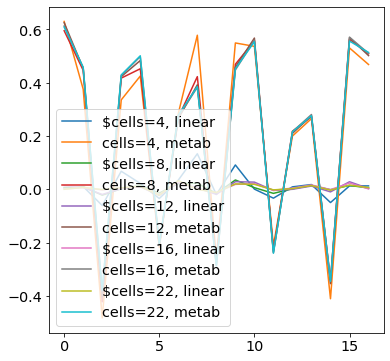

In [6]:
import pdb
for cells in range_cells:
    Multi_linear_dir=csv_directory + '/linear/cells={}'.format(int(cells))
    Multi_metab_dir=csv_directory + '/metab/cells={}'.format(int(cells)) 
    
    phi_Multi_cart_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv').to_numpy()
    phi_Multi_FEM_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv').to_numpy()
    
    phi_Multi_cart_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv').to_numpy()
    phi_Multi_FEM_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv').to_numpy()
    
    q_Multi_linear=np.squeeze(pd.read_csv(Multi_linear_dir + '/q_Multi_linear.csv').to_numpy())
    q_Multi_metab=np.squeeze(pd.read_csv(Multi_metab_dir + '/q_Multi_metab.csv').to_numpy())
    
    plt.plot( np.abs(q_FEM_linear-q_Multi_linear)/q_FEM_linear, label='$cells={}, linear'.format(int(cells)))
    plt.plot(np.abs(q_FEM_metab-q_Multi_metab)/q_FEM_metab, label='cells={}, metab'.format(int(cells)))
    
    plt.legend()

    
    
    
    

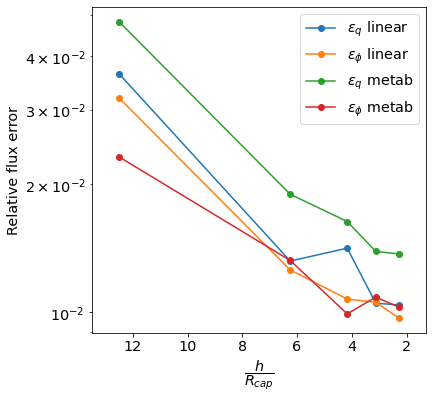

In [17]:
plt.plot(h,pd.read_csv(csv_directory + '/err_q_linear.csv').to_numpy(), '-o', label='$\\varepsilon_q$ linear')
plt.plot(h,pd.read_csv(csv_directory + '/err_phi_linear.csv').to_numpy(),'-o', label='$\\varepsilon_{\phi}$ linear')
plt.plot(h,pd.read_csv(csv_directory + '/err_q_metab.csv').to_numpy(), '-o',label='$\\varepsilon_q$ metab')
plt.plot(h,pd.read_csv(csv_directory + '/err_phi_metab.csv').to_numpy(), '-o',label='$\\varepsilon_{\phi}$ metab')
plt.legend()
plt.xlabel('$\dfrac{h}{R_{cap}}$')
plt.yscale('log')
plt.ylabel('Relative flux error')
plt.xlim(max(h)+1, min(h)-1)
plt.savefig(directory_script + '/Figure_latex/conv.pdf')

In [15]:
name_array=['/err_q_linear.csv','/err_phi_linear.csv','/err_q_metab.csv','/err_phi_metab.csv']

for i in name_array:
    a=pd.read_csv(csv_directory + i)
    a['h']=h
    a.to_csv(directory_script + '/Figure_latex' + i, sep=',', index=None)

In [16]:
cells=range_cells[0]
Multi_linear_dir=csv_directory + '/linear/cells={}'.format(int(cells))
Multi_metab_dir=csv_directory + '/metab/cells={}'.format(int(cells)) 

phi_Multi_cart_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv')
phi_Multi_FEM_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv')

phi_Multi_cart_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv')
phi_Multi_FEM_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv')

q_Multi_linear=pd.read_csv(Multi_linear_dir + '/q_Multi_linear.csv')
q_Multi_metab=pd.read_csv(Multi_metab_dir + '/q_Multi_metab.csv')


,err_q_linear,h
0,0.036414,12.500000
1,0.013208,6.250000
2,0.014162,4.166667
3,0.010509,3.125000
4,0.010416,2.272727
